<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#LAB:-Random-Projections-:-SOLUTIONS" data-toc-modified-id="LAB:-Random-Projections-:-SOLUTIONS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LAB: Random Projections : SOLUTIONS</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Authors:-R.-M.-Gower" data-toc-modified-id="Authors:-R.-M.-Gower-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Authors: R. M. Gower</a></span></li></ul></li></ul></li><li><span><a href="#Aim" data-toc-modified-id="Aim-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Aim</a></span></li><li><span><a href="#VERY-IMPORTANT" data-toc-modified-id="VERY-IMPORTANT-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>VERY IMPORTANT</a></span></li></ul></li><li><span><a href="#Gentle-reminder:-no-evaluation-if-you-don't-respect-this-EXACTLY" data-toc-modified-id="Gentle-reminder:-no-evaluation-if-you-don't-respect-this-EXACTLY-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gentle reminder: no evaluation if you don't respect this EXACTLY</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#How-to-construct-the-name-of-your-file" data-toc-modified-id="How-to-construct-the-name-of-your-file-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>How to construct the name of your file</a></span></li></ul></li><li><span><a href="#EXERCISE-1:" data-toc-modified-id="EXERCISE-1:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>EXERCISE 1:</a></span><ul class="toc-item"><li><span><a href="#Corollary-of-Range-Space-Preserving-Theorem" data-toc-modified-id="Corollary-of-Range-Space-Preserving-Theorem-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Corollary of Range Space Preserving Theorem</a></span></li><li><span><a href="#End-Corollary" data-toc-modified-id="End-Corollary-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>End Corollary</a></span></li></ul></li><li><span><a href="#Exercise-2:" data-toc-modified-id="Exercise-2:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Exercise 2:</a></span></li><li><span><a href="#Load-and-test-easier-data-set-anthracyclineTaxaneChemotherapy" data-toc-modified-id="Load-and-test-easier-data-set-anthracyclineTaxaneChemotherapy-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Load and test easier data set <em>anthracyclineTaxaneChemotherapy</em></a></span><ul class="toc-item"><li><span><a href="#if-fetch_openml-fails" data-toc-modified-id="if-fetch_openml-fails-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>if fetch_openml fails</a></span></li></ul></li><li><span><a href="#Load-and-test-HARDER-data-set-sector.scale" data-toc-modified-id="Load-and-test-HARDER-data-set-sector.scale-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Load and test HARDER data set <em>sector.scale</em></a></span></li><li><span><a href="#Bonus-question" data-toc-modified-id="Bonus-question-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Bonus question</a></span></li></ul></li></ul></div>

# LAB: Random Projections : SOLUTIONS


#### Authors: R. M. Gower

## Aim

The aim of this material is to
- to show that in practice dimension reduction can be used with no loss of accuracy on some problem
- code efficient sparse random projections
- apply sparse random projections together with knearestneighbors


## VERY IMPORTANT

- This work **must be done by pairs of students**.
- **Each** student must send their jupyter notebook **before the 24th of october at 23:59** to **gowerrobert@gmail.com**
- This means that **each student in the pair sends the same file**
- The **name of the file must be** constructed as in the next cell

# Gentle reminder: no evaluation if you don't respect this EXACTLY

### How to construct the name of your file

In [1]:
# Change here using YOUR first and last names
fn1 = "Fangda"
ln1 = "ZHU"
fn2 = "Yuqing"
ln2 = "WANG"

filename = "_".join(map(lambda s: s.strip().lower(), 
                        ["lab1", ln1, fn1, "and", ln2, fn2])) + ".ipynb"
print(filename)

lab1_zhu_fangda_and_wang_yuqing.ipynb


In [2]:
#Throughout the notebook you will find commented boxes like this one

### TODO ###   
# please implement blabla
#############

These boxes need to be replaced by code as explained in the boxes.
Solutions will online tomorrow. Good luck!

In [3]:
%matplotlib inline
try:
    %load_ext memory_profiler
except:
    print("Please run !ip install memory_profiler ")

In [4]:
import numpy as np
import unittest
from scipy.linalg import norm
import matplotlib.pyplot as plt
import sys
# import matplotlib.pylab as plt

In [5]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.neighbors import KNeighborsClassifier 

def get_data(dataname):
    data = load_svmlight_file(dataname)
    return data[0], data[1]

## EXERCISE 1: 

Use LogisticRegression classifier of Scikit-learn to experimentally confirm the following corollary proven in class and test random sparse projections

### Corollary of Range Space Preserving Theorem  

Let 
$$ X = [x_1, \ldots, x_n]^\top \in \mathbb{R}^{n\times d},$$
be our data matrix and let
$$ X X^\top = [\hat{x}_1, \ldots, \hat{x}_n]^\top \in \mathbb{R}^{n\times n}. $$
We can find a solution to the following training problem
$$ w^* \in \min_{w \in \mathbb{R}^d}  \frac{1}{n}\sum_{i=1}^n \ell_i(\langle x_i,w \rangle) \hspace{3cm} (I)$$
by instead solving 
$$ \hat{w}^* \in \min_{w \in \mathbb{R}^n}  \frac{1}{n}\sum_{i=1}^n \ell_i(\langle \hat{x}_i,w \rangle) \hspace{3cm} (II)$$
and recover the solution via $ w^* = X^\top \hat{w}^*.$

**NOTE:** The matrix $X$ is transposed with respect to the data matrix defined in class and in the lectures ! Be careful with dimnensions!
### End Corollary

1) Show that by setting the regularization parameter close to zero (C = 10^9) in LogisticRegression, the score obtained by training using $X$ and $X^\top X$ is the same
  
2) Compute a solution $w^*_1$  by directly solving (I).  Compare this $w^*_1$ to the recovered solution $X^\top \hat{w}^*$. Are they the same? Justify based on Corollary.

3) Using a random generated gaussian matrix $W \in\mathbb{R}^{d\times r}$ , project the data matrix $X \rightarrow XW$. Test for different values of r and
apply logistic regression to the resulting projected matrix. Can you explain what you observe? 

In [6]:
# download the colon-cancer data set from 
# https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/colon-cancer.bz2
# Unpack and place in the same folder as this python notebook
dataname = "colon-cancer"  
X, y = get_data(dataname)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n, d = X_train.shape
print('{n} data points and {d} features'.format(n = n,d =d))

41 data points and 2000 features


In [7]:
C0 = 10**9 # 0.0005 # inverse of the regularization parameter, i.e, C = 1/lambda
log_reg = LogisticRegression(C = C0) # , multi_class = "multinomial"
log_reg.fit(X_train, y_train)
print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the training set: 0.619


D:\Users\zhufa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
### TODO ###   
# 2)  Compute a solution $w^*_1$  by directly solving (I).  
# Compare this $w^*_1$ to the recovered solution $X^\top \hat{w}^*$.
# Are they the same? Justify based on Corollary.
X_train_ = X_train.dot(X_train.T)
X_test_ = X_test.dot(X_train.T)
log_reg_ = LogisticRegression(C = C0, solver='liblinear')
log_reg_.fit(X_train_,y_train)
print('Accuracy on the training set: {:.3f}'.format(log_reg_.score(X_train_,y_train)))
print('Accuracy on the training set: {:.3f}'.format(log_reg_.score(X_test_,y_test)))
w = log_reg.coef_
w_hat = log_reg_.coef_*X_train
np.sum(w - w_hat)
#############

Accuracy on the training set: 1.000
Accuracy on the training set: 0.619


1.9405387538089003

The sum of the difference between $X$ and $X^\top X$ is 1.94

project dimension   41 gives: (train, test) =  (1.0000, 0.5714)
project dimension   43 gives: (train, test) =  (1.0000, 0.5714)
project dimension   45 gives: (train, test) =  (1.0000, 0.7143)
project dimension   47 gives: (train, test) =  (1.0000, 0.6667)
project dimension   49 gives: (train, test) =  (1.0000, 0.5714)
project dimension   51 gives: (train, test) =  (1.0000, 0.6667)
project dimension   53 gives: (train, test) =  (1.0000, 0.6667)
project dimension   55 gives: (train, test) =  (1.0000, 0.6667)
project dimension   57 gives: (train, test) =  (1.0000, 0.6667)
project dimension   59 gives: (train, test) =  (1.0000, 0.7143)
project dimension   61 gives: (train, test) =  (1.0000, 0.7143)
project dimension   63 gives: (train, test) =  (1.0000, 0.6667)
project dimension   65 gives: (train, test) =  (1.0000, 0.6667)
project dimension   67 gives: (train, test) =  (1.0000, 0.6190)
project dimension   69 gives: (train, test) =  (1.0000, 0.6190)
project dimension   71 gives: (train, te

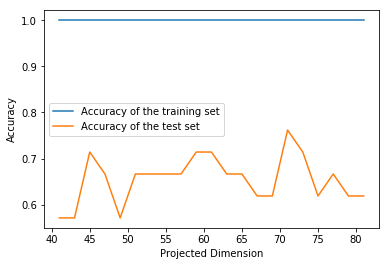

In [9]:
### TODO ### 
## Choose a range of different projected dimensions to test
## project_dimensions = range(???)
#############
test_accuracy = []
training_accuracy = []
s = 2*X_train.shape[0]
project_dimensions = np.arange(X_train.shape[0],s,2)
W = np.random.normal(0,1,X_train.shape[1]* 2*X_train.shape[0]).reshape(X_train.shape[1],2*X_train.shape[0])
for r in project_dimensions: 
    ### TODO ###   
    # 3)    project the data matrix $X \rightarrow XW$ using Gaussian and fit, 
    #      transform and score using Logstic Regression
    # trainscore =  ??
    # training_accuracy.append(trainscore)
    # testscore = ??
    # test_accuracy.append(testscore)
    W_ = W[:,:r]
    X_train_ = X_train.dot(W_)
    X_test_ = X_test.dot(W_)
    log_reg_ = LogisticRegression(C = C0, solver='liblinear')
    log_reg_.fit(X_train_,y_train)
    trainscore = log_reg_.score(X_train_,y_train)
    training_accuracy.append(trainscore)
    testscore = log_reg_.score(X_test_,y_test)
    test_accuracy.append(testscore)
    #############
    print ("project dimension %4d gives: (train, test) =  (%.4f, %.4f)" % (r, trainscore,testscore))
# coef_recover= log_regt.coef_.dot(X_train.transpose())

plt.plot(project_dimensions,training_accuracy, label='Accuracy of the training set')
plt.plot(project_dimensions,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Projected Dimension')
plt.legend()
index_max = np.argmax(test_accuracy)
print("Best score was for r =%5d with: (train, test) =  (%.4f, %.4f)"% (project_dimensions[index_max], training_accuracy[index_max],test_accuracy[index_max]))

3) Gaussian random projection can act like a regularizor and increase the prediction accuracy.

## Exercise 2:

Now we will work with large text based data set. For this you need to code the following random transform $W \in \mathbb{R}^{d \times r}$ that take a sparsity parameter $s$ as an input:

$$ W_{ij}  = \sqrt{\frac{s}{r}}
\begin{cases}
1 \quad & \mbox{with probability }\frac{1}{2s} \\
0 \quad & \mbox{with probability }1-\frac{1}{s} \\
-1 \quad & \mbox{with probability }\frac{1}{2s} 
\end{cases}$$

* Code a function Generate_Sparse_Transform$(s,r,d)$ that takes an input  
   * sparsity parameter  $s$
   * input dimension $d \in \mathbb{N}$
   * lower dimensional projected dimension $r \in \mathbb{N}$
and gives as output a random transform,  stored in an efficient format

* Code a function Apply_Sparse_Transform$(R,X)$ that takes an input
   * the random transform $W$ as generated by  Generate\_sparse\_transform$(s,r,d)$
   * a given data matrix $X \in \mathbb{R}^{n\times d}$
the output will be $XW$. Note that this looks different then our class notes where we have $W^\top X.$ The reason for this is that the data is transposed here!


*Note* if you have not implemented this efficiently, you will probably run out of memory!  


We will test if random projections are able to preserve pairwise distances by applying K-Neighrest Neighbors to projected data.

1) Code the above two functions (their stub is provided below)


2) Load the data set X. Then fit, transform and score sklearn's KNeighborsClassifier on this data, where 
$X = $ {anthracyclineTaxaneChemotherapy, sector.scale}. Below you will find how to load this data.

3) Repeat the previous step, but first randomly project that data using X -> XW. Repeat this test for different values of the sparsity parameter s and projected dimension parameter r. What can you conclude? 

*Hint* As a rule of thumb $s = \sqrt{r}$ often works well, and is a good trade off between sparsity and project dimension size. 


In [10]:
import scipy
from sklearn.utils.extmath import safe_sparse_dot   ## <-- I recommend using this function
from sklearn.utils.random import sample_without_replacement  ## <-- I recommend using this function

def GenerateSparseTransform(s,r,d):
    '''
    Implement this function. Make sure that W is a sparse matrix.
    
    Input : 
        s : sparsity parameter s
        r : 
        d : input dimension
    
    Returns:
        W : a sparse matrix, of size d by r
    '''
    a = [1, 0, -1]
    size = (d, r)
    p = [1/(2*s), 1-1/s, 1/(2*s)]
    W = np.sqrt(s/r) * np.random.choice(a,size,p=p)
    W = scipy.sparse.csr_matrix(W)
    
    return W

def GenerateSparseTransform2(s,r,d):
    '''
    Implement this function. Make sure that W is a sparse matrix.
    
    Input : 
        s : sparsity parameter s
        r : 
        d : input dimension
    
    Returns:
        W : a sparse matrix, of size d by r
    '''

    p = np.sqrt(s/r)
    W = scipy.sparse.rand(d, r, density=1/s, format='lil')
    V = scipy.sparse.find(W)
    for i,j,v in zip(V[0], V[1], V[2]):
        W[i, j] = p if v >0.5 else -p
            
    return W

def GenerateSparseTransform3(s,r,d):
    '''
    Implement this function. Make sure that W is a sparse matrix.
    
    Input : 
        s : sparsity parameter s
        r : 
        d : input dimension
    
    Returns:
        W : a sparse matrix, of size d by r
    '''

    p = np.sqrt(s/r)
    W = scipy.sparse.rand(d, r, density=1/s, format='lil')
    W[W>0.50] = -1
    W[W>0] = -p
    W[W == -1] = p
    
            
    return W

def ApplySparseTransform(W,X_):
#     W   : Sparse randomly generated matrix of size d by r
#     X_  : Data matrix to be compressed, of size n by d
#    NOTE: The dimensions of W and X_ are such that the product X_*W is defined (which is different that what we used in class)
    ### TODO ### 
    ##  Implement this function. Make sure that W is a sparse matrix!
    Xtransformed = safe_sparse_dot(X_,W.todense())
    #############
    return Xtransformed

We came up with 3 different ways to create the sparse matrix. The first way is to create the matrix we need, then store it into a sparse matrix. The second and the third  way to create a random sparse matrix, then modifiy the elements' value and sign. In the next step, we will compare these three ways and finally choose the best one.

In [11]:
class UtilsTest(unittest.TestCase):
    
    def test_GenerateSparseTransform(self):
        %time GenerateSparseTransform(4,2000,2000)
        %memit GenerateSparseTransform(4,2000,2000)
        s,r,d = 4,2000,2000
        W = GenerateSparseTransform(s,d,r)
        A = scipy.sparse.find(W)
        nb_nonzero = len(A[0])
        print('Size:',sys.getsizeof(W))
        self.assertAlmostEqual(1-1/s,1 - nb_nonzero/(d*r), 3)
        self.assertAlmostEqual(1/(2.*s),np.sum(W>0)/(d*r), 3)
        self.assertAlmostEqual(1/(2.*s),np.sum(W<0) /(d*r), 3)
        
    def test_GenerateSparseTransform2(self):
        %time GenerateSparseTransform2(4,2000,2000)
        %memit GenerateSparseTransform2(4,2000,2000)
        s,r,d = 4,2000,2000
        
        W = GenerateSparseTransform2(s,d,r)
        print('Size:',sys.getsizeof(W))
        A = scipy.sparse.find(W)
        nb_nonzero = len(A[0])
        self.assertAlmostEqual(1-1/s,1 - nb_nonzero/(d*r), 3)
        self.assertAlmostEqual(1/(2.*s),np.sum(W>0)/(d*r), 3)
        self.assertAlmostEqual(1/(2.*s),np.sum(W<0) /(d*r), 3)
        
        
    def test_GenerateSparseTransform3(self):
        %time GenerateSparseTransform3(4,2000,2000)
        %memit GenerateSparseTransform3(4,2000,2000)
        s,r,d = 4,2000,2000
        W = GenerateSparseTransform3(s,d,r)
        print('Size:',sys.getsizeof(W))
        A = scipy.sparse.find(W)
        nb_nonzero = len(A[0])
        self.assertAlmostEqual(1-1/s,1 - nb_nonzero/(d*r), 3)
        self.assertAlmostEqual(1/(2.*s),np.sum(W>0)/(d*r), 3)
        self.assertAlmostEqual(1/(2.*s),np.sum(W<0) /(d*r), 3)
        

    def test_ApplySparseTransform(self):
        s,r,d = 4,2000,2000
        W = GenerateSparseTransform(s,d,r)
        X = scipy.sparse.rand(d, r, density=np.random.rand(1), format='lil')
        XT = ApplySparseTransform(W, X)
        sol = X.A.dot(W.A)
        
        self.assertAlmostEqual(np.sum(sol - XT.A), 0.0, 6)
                
suite = unittest.TestLoader().loadTestsFromTestCase(UtilsTest)        
unittest.TextTestRunner(verbosity=2).run(suite)  

test_ApplySparseTransform (__main__.UtilsTest) ... ok
test_GenerateSparseTransform (__main__.UtilsTest) ... 

Wall time: 280 ms
peak memory: 187.95 MiB, increment: 54.51 MiB


ok
test_GenerateSparseTransform2 (__main__.UtilsTest) ... 

Size: 56
Wall time: 8.06 s
peak memory: 253.47 MiB, increment: 119.28 MiB
Size: 56


ok
test_GenerateSparseTransform3 (__main__.UtilsTest) ... 

Wall time: 3.9 s
peak memory: 277.70 MiB, increment: 141.84 MiB
Size: 56


ok

----------------------------------------------------------------------
Ran 4 tests in 50.210s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

In [12]:
%time GenerateSparseTransform(4,200,61359)
%memit GenerateSparseTransform(4,200,61359)
%time GenerateSparseTransform2(4,200, 61359)
%memit GenerateSparseTransform2(4,200,61359)
%time GenerateSparseTransform3(4,200,61359)
%memit GenerateSparseTransform3(4,200,61359)

Wall time: 808 ms
peak memory: 344.09 MiB, increment: 206.54 MiB
Wall time: 26.3 s
peak memory: 543.64 MiB, increment: 407.14 MiB
Wall time: 11.9 s
peak memory: 535.48 MiB, increment: 398.14 MiB


When the data's dimension is not too big, it seems that the first way can create a sparse matrix more quickly and costs less memory. But we are not sure if it works as well when the data's dimension grows larger.

In [13]:
%time GenerateSparseTransform(70,4269,55197)
%memit GenerateSparseTransform(70,4296,55197)
%time GenerateSparseTransform2(70,4296,55197)
%memit GenerateSparseTransform2(70,4296,55197)
%time GenerateSparseTransform3(70,4296,55197)
%memit GenerateSparseTransform3(70,4296,55197)

Wall time: 11.2 s
peak memory: 4562.05 MiB, increment: 4423.51 MiB
Wall time: 28.2 s
peak memory: 657.70 MiB, increment: 520.28 MiB
Wall time: 12.6 s
peak memory: 676.61 MiB, increment: 537.91 MiB


According to the result of profiling, we find out that when the data's dimension grow large, the performence of the first implementation is much worse. It seems that the third way works best in this circumstance.

## Load and test easier data set *anthracyclineTaxaneChemotherapy*

In [14]:
#from sklearn.datasets import fetch_openml
#chemo = fetch_openml(name='anthracyclineTaxaneChemotherapy')

### if fetch_openml fails  
**ALTERNATIVE HACK for loading the data**
  
* downloard the data from data set in arff format from: https://www.openml.org/d/1085
 
* place data in the same folder as this notebook and run the code in the next cell

In [15]:
## ALTERNATIVE HACK for loading anthracyclineTaxaneChemotherapy ## 
from scipy.io import arff
dataset = arff.loadarff('phpCLGrjq.arff')
import pandas as pd
Xdf = pd.DataFrame(dataset[0])
Xy = Xdf.values
n_rows, n_cols = Xy.shape
X = Xy[:,:-1]
X = np.float_(X)
y = Xy[:,-1]
y = (np.int_(y))*2-3

In [ ]:
# split test and training. Only use 20% of data for testing because data set is small. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 
n, d = X_train.shape
print('{n} trainig data points and {d} features'.format(n = n,d =d))

In [ ]:
# 2) fit, transform and score the knn Classifier
n_neighbors =2 # <-- use this number of neighbours
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

knn.fit(X_train,y_train)
trainscore = knn.score(X_train, y_train)
training_accuracy.append(trainscore)
testscore = knn.score(X_test, y_test)
test_accuracy.append(knn.score(X_test, y_test))
print ("project dim %5d gives: (train, test) =  (%.4f, %.4f)" % (d, trainscore,testscore))

In [ ]:
test_accuracy = []
training_accuracy = []
n_neighbors = 2  #< -- I recommend 2 neighbors

### TODO ### 
## Choose a range of different projected dimensions to test
## project_dimensions = range(???)
## HINT: Only test project dimensions  r <= int(min(5*n,d/2))
#############

knn = KNeighborsClassifier(n_neighbors=n_neighbors)
project_dimensions = np.arange(n,int(min(5*n,d/2)),30)

for r in project_dimensions:  
    ### TODO ###   
    # 3)    project the data matrix $X \rightarrow XW$ using Gaussian and fit, 
    #      transform and score using knn
    # W = GenerateSparseTransform(???)
    # Xt_train = ApplySparseTransform(W,X_train)
    # Xt_test =  ApplySparseTransform(W,X_test)
    # trainscore =  ??
    # training_accuracy.append(trainscore)
    # testscore = ??
    # test_accuracy.append(testscore)
    W = GenerateSparseTransform(np.sqrt(r), r, d)
    Xt_train = ApplySparseTransform(W,X_train)
    Xt_test =  ApplySparseTransform(W,X_test)
    knn.fit(Xt_train,y_train)
    trainscore = knn.score(Xt_train, y_train)
    training_accuracy.append(trainscore)
    testscore = knn.score(Xt_test, y_test)
    test_accuracy.append(testscore)
    #############
    print ("project dim %5d gives: (train, test) =  (%.4f, %.4f)" % (r, trainscore,testscore))
    
list_proj_dims = list(project_dimensions)
plt.plot(list_proj_dims,training_accuracy, label='Accuracy of the training set')
plt.plot(list_proj_dims,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Projected Dimension')
plt.legend()
index_max = np.argmax(test_accuracy)
print("Best score was for r =%5d with: (train, test) =  (%.4f, %.4f)"% (list_proj_dims[index_max], training_accuracy[index_max],test_accuracy[index_max]))

## Load and test HARDER data set *sector.scale*  
**(only try this data set after successfully testing the anthracyclineTaxaneChemotherapy data set)**

In [ ]:
# Download the data set from:
# https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/sector/sector.scale.bz2
# place data in the same folder as this python notebook
dataname = "sector.scale"  
X, y = get_data(dataname)
n, d = X.shape
print('{n} data points and {d} features'.format(n = n,d =d))

In [ ]:
# split test and training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n, d = X_train.shape
print('{n} trainig data points and {d} features'.format(n = n,d =d))

In [ ]:
### TODO ### 
## repeat the same experiments for this larger data set
## HINT: Only test project dimensions r <= int(min(2*n,d/2))
n_neighbors = 1 
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

knn.fit(X_train,y_train)
trainscore = knn.score(X_train, y_train)
training_accuracy.append(trainscore)
testscore = knn.score(X_test, y_test)
test_accuracy.append(knn.score(X_test, y_test))
print ("project dim %5d gives: (train, test) =  (%.4f, %.4f)" % (d, trainscore,testscore))
#############

In [ ]:
test_accuracy = []
training_accuracy = []
n_neighbors = 1   ## <-- I recommend using this
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
#project_dimensions = np.arange(20,int(min(2*n,d/2)),300)
project_dimensions = np.arange(n,int(min(2*n,d/2)),int(n/10))
    
for r in project_dimensions:  
    ### TODO ###   
    # 3)    project the data matrix $X \rightarrow XW$ using Gaussian and fit, 
    #      transform and score using Logstic Regression
    # W = GenerateSparseTransform(???)
    # Xt_train = ApplySparseTransform(W,X_train)
    # Xt_test =  ApplySparseTransform(W,X_test)
    # trainscore =  ??
    # training_accuracy.append(trainscore)
    # testscore = ??
    # test_accuracy.append(testscore)
    W = GenerateSparseTransform3(np.sqrt(r), r, d)
    Xt_train = ApplySparseTransform(W,X_train)
    Xt_test =  ApplySparseTransform(W,X_test)
    knn.fit(Xt_train,y_train)
    trainscore = knn.score(Xt_train, y_train)
    training_accuracy.append(trainscore)
    testscore = knn.score(Xt_test, y_test)
    test_accuracy.append(testscore)
    #############
    print ("project dim %5d gives: (train, test) =  (%.4f, %.4f)" % (r, trainscore,testscore))

list_proj_dims = list(project_dimensions)
plt.plot(list_proj_dims,training_accuracy, label='Accuracy of the training set')
plt.plot(list_proj_dims,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Projected Dimension')
plt.legend()
index_max = np.argmax(test_accuracy)
print("Best score was for r =%5d with: (train, test) =  (%.4f, %.4f)"% (list_proj_dims[index_max], training_accuracy[index_max],test_accuracy[index_max]))

## Bonus question

Using the Jonhson-Lindenstrauss Lemma, we can have an estimate for the projected dimension using

$$r = \frac{1}{\epsilon^2}\log(n/\delta) $$

1) Write a function for calculating this given suggested project dimension r. 
2) Test for each of the above data sets with \epsilon = 0.05 = \delta and compare to your results. 

In [ ]:
#1
def calculate_project_dimension(epsilon, delta, n):
    return int(np.log(n/delta)/(epsilon**2))

def calculate_score(X, y, knn):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    n, d = X_train.shape
    epsilon = 0.05
    delta = 0.05
    r = calculate_project_dimension(epsilon,delta, n)
    W = GenerateSparseTransform(np.sqrt(r), r, d)
    Xt_train = ApplySparseTransform(W,X_train)
    Xt_test =  ApplySparseTransform(W,X_test)
    knn.fit(Xt_train,y_train)
    trainscore = knn.score(Xt_train, y_train)
    testscore = knn.score(Xt_test, y_test)
    return trainscore, testscore, r

In [ ]:
#2
#colon-cancer
dataname = "colon-cancer"  
X, y = get_data(dataname)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n, d = X_train.shape
epsilon = 0.05
delta = 0.05
r = calculate_project_dimension(epsilon,delta, n)
W = np.random.normal(0,1,X_train.shape[1]*r).reshape(X_train.shape[1],r)
Xt_train = X_train.dot(W)
Xt_test = X_test.dot(W)
log_reg_ = LogisticRegression(C = C0, solver='liblinear')
log_reg_.fit(Xt_train,y_train)
trainscore = log_reg_.score(Xt_train, y_train)
testscore = log_reg_.score(Xt_test, y_test)
print ("Using the Jonhson-Lindenstrauss Lemma with the datatset colon-cancer, project dim %5d gives: (train, test) =  (%.4f, %.4f)" 
           % (r, trainscore,testscore))

Using the Jonhson-Lindenstrauss Lemma on the "colon-cancer" dataset, we calculate the r = 2683, which is more than it's own dimension. So the final result is worse.

In [ ]:
#anthracyclineTaxaneChemotherapy
Xdf = pd.DataFrame(dataset[0])
Xy = Xdf.values
n_rows, n_cols = Xy.shape
X = Xy[:,:-1]
X = np.float_(X)
y = Xy[:,-1]
y = (np.int_(y))*2-3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n, d = X_train.shape
r = calculate_project_dimension(epsilon,delta, n)
W = GenerateSparseTransform3(np.sqrt(r), r, d)
Xt_train = ApplySparseTransform(W,X_train)
Xt_test =  ApplySparseTransform(W,X_test)
n_neighbors = 2
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(Xt_train,y_train)
trainscore = knn.score(Xt_train, y_train)
testscore = knn.score(Xt_test, y_test)
print ("Using the Jonhson-Lindenstrauss Lemma with the datatset Chemo, project dim %5d gives: (train, test) =  (%.4f, %.4f)" 
           % (r, trainscore,testscore))

With the Jonhson-Lindenstrauss Lemma, the dimension is reduced to 3063, which is much bigger than 5n. And we can see that the predict score is slightly better than the best result before.

In [ ]:
#sector.scale
dataname = "sector.scale"  
X, y = get_data(dataname)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n, d = X_train.shape
r = calculate_project_dimension(epsilon,delta, n)
W = GenerateSparseTransform3(np.sqrt(r), r, d)
Xt_train = ApplySparseTransform(W,X_train)
Xt_test =  ApplySparseTransform(W,X_test)
n_neighbors = 1
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(Xt_train,y_train)
trainscore = knn.score(Xt_train, y_train)
testscore = knn.score(Xt_test, y_test)
print ("Using the Jonhson-Lindenstrauss Lemma with the datatset sector.scale, project dim %5d gives: (train, test) =  (%.4f, %.4f)" 
           % (r, trainscore,testscore))

With the Jonhson-Lindenstrauss Lemma, we get the dimension of 4544, it's not far from n. Comparing the predict score with the best score we got before, which is 0.8823, it seems that the score is slightly lower. 